<a href="https://colab.research.google.com/github/Himabindugssn/Text-Classification-Models/blob/main/2_CNNs_and_CNN%2BBiLSTM_and_MultichannelCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
import tensorflow.keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.math import l2_normalize
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Loading Dataset

In [ ]:
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=5000) 

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
word_idx=imdb.get_word_index() #getting vocab from imdb data

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
maxlen=500
vocab_size=5000
emb_dimension=300
xtrain=pad_sequences(xtrain,maxlen=maxlen,padding='post')
xtest=pad_sequences(xtest,maxlen=maxlen,padding='post')

#2 BiLSTM

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review


In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


17465344/17464789 [==============================] - 1s 0us/step
25000 Training sequences
25000 Validation sequences


In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(maxlen,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 256)          263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 3,217,665
Trainable params: 3,217,665
Non-trainable params: 0
_________________________________________________________________


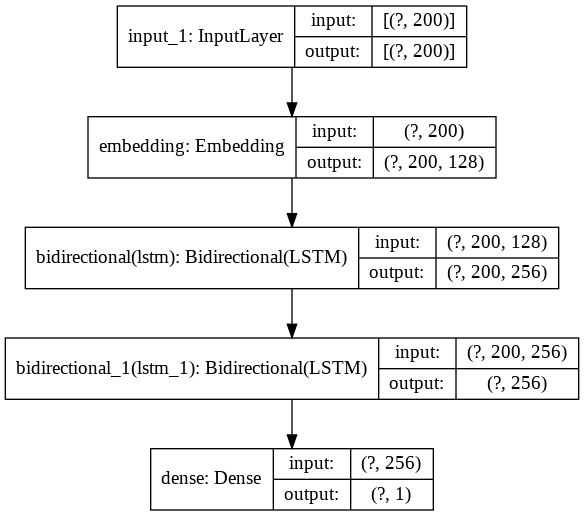

In [ ]:
plot_model(model, show_shapes=True, to_file='multichannel.png')


In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
782/782 [==============================] - 213s 272ms/step - loss: 0.4805 - accuracy: 0.7757 - val_loss: 0.4365 - val_accuracy: 0.7973
Epoch 2/10
782/782 [==============================] - 208s 266ms/step - loss: 0.3134 - accuracy: 0.8730 - val_loss: 0.3943 - val_accuracy: 0.8389
Epoch 3/10
782/782 [==============================] - 208s 267ms/step - loss: 0.2162 - accuracy: 0.9171 - val_loss: 0.3322 - val_accuracy: 0.8655
Epoch 4/10
782/782 [==============================] - 210s 269ms/step - loss: 0.1508 - accuracy: 0.9474 - val_loss: 0.3758 - val_accuracy: 0.8530
Epoch 5/10
782/782 [==============================] - 210s 268ms/step - loss: 0.1072 - accuracy: 0.9649 - val_loss: 0.3966 - val_accuracy: 0.8554
Epoch 6/10
782/782 [==============================] - 210s 268ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.4901 - val_accuracy: 0.8624
Epoch 7/10
782/782 [==============================] - 209s 267ms/step - loss: 0.0488 - accuracy: 0.9858 - val_loss: 0.5366 -

# CNN + 1 BiLSTM

In [ ]:
from keras.utils.vis_utils import plot_model


In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Conv1D(128, kernel_size=3)(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
#plot_model(model, show_shapes=True, to_file='multichannel.png')

model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         49280     
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           129       
Total params: 2,708,225
Trainable params: 2,708,225
Non-trainable params: 0
_________________________________________________________________


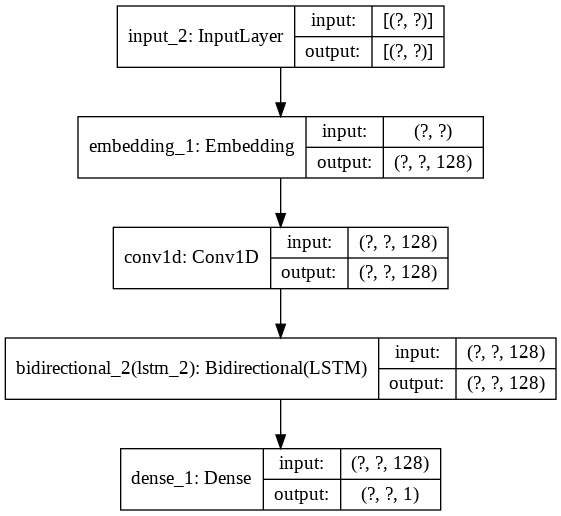

In [ ]:
plot_model(model, show_shapes=True, to_file='multichannel.png')


In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


25000 Training sequences
25000 Validation sequences


In [ ]:
opt= keras.optimizers.Adam(learning_rate=0.1)
model.compile(opt, "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=4, validation_data=(x_val, y_val))

Epoch 1/4
196/196 [==============================] - 11s 56ms/step - loss: 0.6946 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/4
196/196 [==============================] - 11s 56ms/step - loss: 0.6943 - accuracy: 0.4986 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/4
196/196 [==============================] - 11s 58ms/step - loss: 0.6943 - accuracy: 0.4998 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/4
196/196 [==============================] - 11s 57ms/step - loss: 0.6941 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5000


#multichannel CNN (add to main list)



In [ ]:
print(maxlen, max_features)

200 20000


In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


25000 Training sequences
25000 Validation sequences


In [ ]:
inputs1 = Input(shape=(maxlen,))
embedding1 = Embedding(max_features, 200)(inputs1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
outputs = Dense(1, activation='sigmoid')(dense1)
model = Model(inputs=inputs1, outputs=outputs)

# compile
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
196/196 [==============================] - 7s 37ms/step - loss: 0.4478 - accuracy: 0.7712 - val_loss: 0.2944 - val_accuracy: 0.8817
Epoch 2/10
196/196 [==============================] - 7s 38ms/step - loss: 0.2197 - accuracy: 0.9122 - val_loss: 0.3169 - val_accuracy: 0.8652
Epoch 3/10
196/196 [==============================] - 7s 37ms/step - loss: 0.1520 - accuracy: 0.9432 - val_loss: 0.2995 - val_accuracy: 0.8738
Epoch 4/10
196/196 [==============================] - 7s 37ms/step - loss: 0.1010 - accuracy: 0.9641 - val_loss: 0.3257 - val_accuracy: 0.8703
Epoch 5/10
196/196 [==============================] - 7s 37ms/step - loss: 0.0650 - accuracy: 0.9789 - val_loss: 0.4568 - val_accuracy: 0.8416
Epoch 6/10
196/196 [==============================] - 7s 37ms/step - loss: 0.0367 - accuracy: 0.9891 - val_loss: 0.4922 - val_accuracy: 0.8427
Epoch 7/10
196/196 [==============================] - 7s 36ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 0.5012 - val_accuracy: 0.8556

In [ ]:
# channel 1
inputs1 = Input(shape=(maxlen,))
embedding1 = Embedding(max_features, 200)(inputs1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

# channel 2
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding1)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

# channel 3
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding1)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

# merge
merged = concatenate([flat1, flat2, flat3])
# interpretation
dense1 = Dense(10, activation='relu')(merged)
outputs = Dense(1, activation='sigmoid')(dense1)
model = Model(inputs=inputs1, outputs=outputs)
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# summarize
print(model.summary())

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_29 (Embedding)        (None, 200, 200)     4000000     input_31[0][0]                   
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 197, 32)      25632       embedding_29[0][0]               
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 195, 32)      38432       embedding_29[0][0]               
______________________________________________________________________________________

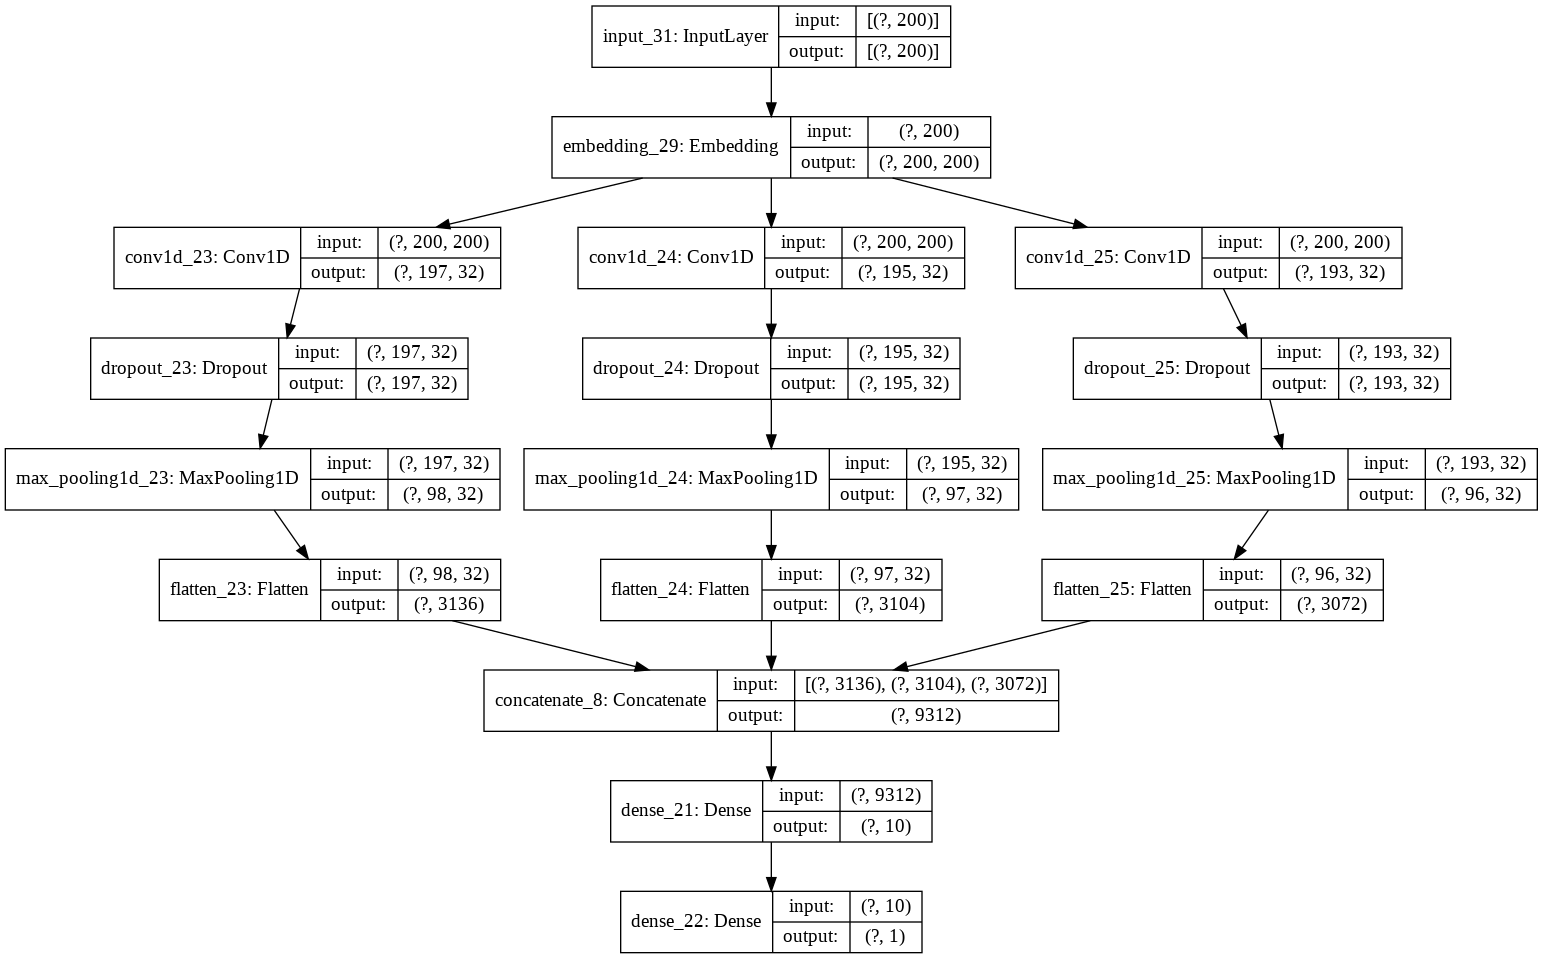

In [ ]:
plot_model(model, show_shapes=True, to_file='multichannel.png')


In [ ]:

model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
196/196 [==============================] - 12s 61ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.6444 - val_accuracy: 0.8525
Epoch 2/10
196/196 [==============================] - 12s 61ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.7782 - val_accuracy: 0.8402
Epoch 3/10
196/196 [==============================] - 12s 61ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.7778 - val_accuracy: 0.8515
Epoch 4/10
196/196 [==============================] - 12s 59ms/step - loss: 7.2035e-04 - accuracy: 0.9998 - val_loss: 0.8347 - val_accuracy: 0.8502
Epoch 5/10
196/196 [==============================] - 12s 61ms/step - loss: 2.7622e-04 - accuracy: 1.0000 - val_loss: 0.8941 - val_accuracy: 0.8488
Epoch 6/10
196/196 [==============================] - 12s 59ms/step - loss: 1.0355e-04 - accuracy: 1.0000 - val_loss: 0.8935 - val_accuracy: 0.8526
Epoch 7/10
196/196 [==============================] - 11s 58ms/step - loss: 4.3826e-05 - accuracy: 1.0000 - val_loss: 0.9212